In [2]:
import pandas as pd
import numpy as np
import json
import re 
import sys
import cv2
from PIL import Image



C:\Users\Legion\AppData\Local\Temp\ipykernel_11460\2024032813.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'PIL'

In [2]:
import sys
print(sys.version)
!pip list


3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]


In [4]:
pip install pandas numpy opencv-python-headless pillow scikit-learn scikit-image matplotlib spotipy requests tensorflow


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/87/03/fe50521919aa981f6a1c197037da4623a267b0e5f42246d69ba048e86da3/pandas-2.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/16/2e/86f24451c2d530c88daf997cb8d6ac622c1d40d19f5a031ed68a4b73a374/numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/20/44/458a0a135866f5e08266566b32ad9a182a7a059a894effe6c41a9c841ff1/opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/51/07/7e9266a59bb267b56c1f432f6416653b9a78dda771c57740d064a8aa2a44/pillow-10.2.0-cp312-cp312-win_amd64.whl.metadata
  Using cached pillow-10.2.0-cp312-cp312-win_amd64.whl.metadata (9.9 kB)

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
 python install pip



SyntaxError: invalid syntax (3483320875.py, line 1)

In [118]:
%matplotlib inline

In [119]:
#another useful command to make data exploration easier
# NOTE: if you are using a massive dataset, this could slow down your code. 
# display.max_columns use to read all columns in preview
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [120]:
df = pd.read_csv('C:\\Users\\Legion\\Desktop\\mood_wala.csv')

In [121]:
spotify_df = df.copy()

In [122]:
spotify_df.shape

(1586, 18)

In [123]:
# The line of code you provided is extracting the column names from the DataFrame spotify_df where the data type is 'float64'

float_cols = spotify_df.dtypes[spotify_df.dtypes == 'float64'].index.values

In [124]:
# Creating a new column 'bucket_popularity' in the DataFrame 'spotify_df'
# The values in the new column are derived from the 'popularity' column by dividing each value by 5 and converting to integer

spotify_df['bucket_popularity'] = spotify_df['popularity'].apply(lambda x: int(x/5))

In [125]:
spotify_df.head()

,Unnamed: 0.1,Unnamed: 0,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,Mood,bucket_popularity
0,0,0,Radhe Shyam,1,7Bnc9gWHdjZAmjSuTY42CJ,Aashiqui Aa Gayi,spotify:track:7Bnc9gWHdjZAmjSuTY42CJ,0.587,0.527,0.495,0.000000,0.127,-7.783,0.0353,122.826,0.474,53,Sad,10
1,1,1,Radhe Shyam,2,4hPxFf3Rd18BRtTYRcqZir,Soch Liya,spotify:track:4hPxFf3Rd18BRtTYRcqZir,0.484,0.597,0.520,0.000001,0.103,-7.624,0.0360,119.923,0.192,54,Sad,10
2,2,2,Radhe Shyam,3,7j1ITbGbqY40RmHMgpTWn2,Udd Jaa Parindey,spotify:track:7j1ITbGbqY40RmHMgpTWn2,0.510,0.555,0.631,0.009250,0.187,-9.910,0.0382,122.011,0.311,34,Sad,6
3,3,3,Radhe Shyam,4,2q4Lxk4MskxCtKjCZaL7IN,Jaan Hai Meri,spotify:track:2q4Lxk4MskxCtKjCZaL7IN,0.693,0.536,0.623,0.000002,0.137,-7.856,0.0743,79.915,0.398,42,Sad,8
4,4,4,Radhe Shyam,5,4B4hRyO842T5th9ucxPQGJ,Main Ishq Mein Hoon,spotify:track:4B4hRyO842T5th9ucxPQGJ,0.598,0.386,0.586,0.000002,0.103,-8.108,0.0474,132.975,0.190,36,Sad,7


In [126]:
scope = 'user-library-read'
client_id = '3a98f83d33c547668bcd83dbd32eb699'
client_secret = '93f3ad98a52545d0884323e1ad45344a'    

In [127]:
# Here In this Line creating instance of SpotifyClientCredentials with the provided client_id and client_secret

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

# Creating a Spotify instance (sp) with the created auth_manager

sp = spotipy.Spotify(auth_manager=auth_manager)

In [128]:
# Prompting the user to authenticate and authorize the application through Spotify
# This line initiates the OAuth 2.0 authorization flow to obtain a user-specific access token

token = util.prompt_for_user_token(scope, client_id=client_id, client_secret=client_secret, redirect_uri='http://localhost:8400/')

In [130]:
# Creating a Spotify API client object using the obtained access token

sp = spotipy.Spotify(auth=token)

In [131]:
#gather playlist names from user account playlists
#This Id name use as the parameter of Get_Spotify_Playlist_DataFrame function which is called in Recommend_top1function 
id_name = {}
for i in sp.current_user_playlists()['items']:
    id_name[i['name']] = i['uri'].split(':')[2]

In [132]:
id_name

{'Surprise': '68k3xJAuFWzHVXkTsmeLAL',
 'Neutral': '2iNbFXWYlEurSZufFtmJK0',
 'Sad': '13Vpe8RwF4vKmTlcbfabdX',
 'Fear': '3JOtoVzJkqopjXmaxcuBZf',
 'Disgust': '47oyvzXHlZ84tKAUfe71lV',
 'Angry': '5ur2FjOT6WgyMOiV0p0jME',
 'Happy': '4mluGjfzgdHISqxcgmAt03',
 'Telgu': '6ZSXLok2nhRaepBTFKDmRO',
 'Punjabi': '5qesxpIzXb6KztJTwAz6q6',
 'Morning': '63t2eyGKeUEYA21JbJeOOW',
 'Yo': '00VKfDv9RHDao3gUgVIU4n',
 'Love': '7DPXdbezN1cwYPSRbNaVAy'}

In [133]:
# This function filters the Spotify DataFrame based on the given emotion (x) to create a specific dataset.
# The resulting dataset includes songs associated with the specified moods related to the given emotion.

def ChooseDataset(x):
    if x == "Disgust":
        return spotify_df[spotify_df['Mood'].isin([ 'Happy', 'Calm'])]
    if x == "Angry":
        return spotify_df[spotify_df['Mood'].isin(['Energetic', 'Calm'])]
    if x == "Fear":
        return spotify_df[spotify_df['Mood'].isin(['Happy', 'Calm','Sad'])]
    if x == "Happy":
        return spotify_df[spotify_df['Mood'].isin(['Energetic', 'Happy', 'Calm'])]
    if x == "Sad":
        return spotify_df[spotify_df['Mood'].isin(['Sad','Calm'])]
    if x == "Surprise":
        return spotify_df[spotify_df['Mood'].isin(['Energetic', 'Happy', 'Sad'])]
    return spotify_df

In [40]:
from tensorflow.keras.models import load_model

loaded_model = load_model('D:\\Music-recommendation-based-on-facial-emotion-recognition-main (1)\\Music-recommendation-based-on-facial-emotion-recognition-main\\new_img_data\\model.keras', compile = True)

In [134]:

# Function to recommend songs
def Recommend_Playlist(spotify_df):
    
    # Randomly sample 10 songs from the provided dataframe
    recommended_songs = spotify_df.sample(10)
    
    # Keep only selected columns (name, album, uri, id)
    recommended_songs = recommended_songs[['name', 'album','uri','id']]
    return recommended_songs


#This function retrieves the album cover image URL for a given Spotify track using the Spotify API. 
def get_spotify_track_image(track_id, spotify_token):
 
    # Set up headers with the provided Spotify API access token
    headers = {
        'Authorization': f'Bearer {spotify_token}',
       }

    # Spotify API endpoint to get track details
    endpoint = f'https://api.spotify.com/v1/tracks/{track_id}'
    
    # Make a GET request to the Spotify API
    response = requests.get(endpoint, headers=headers)
    
    if response.status_code == 200:
        # Extract the image URL from the API response
        image_url = response.json()['album']['images'][0]['url']
        return image_url
    else:
        # If the request fails, return None
        return None

def visualize_songs(top10_recommendation, spotify_token):
    
    # Extracting track IDs from the recommendation DataFrame
    temp = top10_recommendation['id'].values
    
    # Setting up the plot figure with appropriate size
    plt.figure(figsize=(15, int(0.625 * len(temp))))
    
    # Defining the number of columns in the grid
    columns = 3
    
    # Loop through each track ID and display its album cover image
    for i, track_id in enumerate(temp):
        
        # Get the image URL for the track from Spotify API
        image_url = get_spotify_track_image(track_id, spotify_token)
        
        if image_url:
            # Set up a subplot for each track in the grid
            plt.subplot(int(len(temp) / columns) + 1, columns, i + 1)
            
            try:
                # Attempt to load the image; handle cases where the image is truncated or invalid.
                image_content = requests.get(image_url).content
                image = io.imread(image_content, plugin='imageio')
                
                # Display the image and track information.
                plt.imshow(image)
                plt.xticks(color='b', fontsize=0.1)
                plt.yticks(color='b', fontsize=0.1)
                plt.xlabel(top10_recommendation['name'].values[i], fontsize=12)
                plt.tight_layout(h_pad=0.4, w_pad=0)
                plt.subplots_adjust(wspace=None, hspace=None)
            
            except Exception as e:
                print(f"Error loading image for track {track_id}: {e}")

    plt.show()

# Main function for recommendation
def Recommend_Top10(emotions, spotify_df):
    # Choose the dataset based on the emotion
    emotion_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
    emotion = emotion_dict[emotions[-1]]  # Use the most recent emotion

    O_df = ChooseDataset(emotion)

    # Recommended Songs stored here
    top10_recommendation = Recommend_Playlist(spotify_df)
    print("Detected Emotion is :- ",emotion)
    
    # Visualize recommended songs
    visualize_songs(top10_recommendation,token)

In [135]:
def moodNamePrintFromLabel(n):
    emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    return emotions[n]

# Function to capture video from webcam and perform emotion detection
def capture_and_detect_emotion(model):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    video_cap = cv2.VideoCapture(0)  # Open the webcam

    emotions = []
    start_time = cv2.getTickCount()

    while (video_cap.isOpened()):
        ret, frame = video_cap.read()

        if not ret:
            print("Failed to capture frame")
            break

        gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)

        for (x, y, w, h) in faces:
            pxl_lst = []
            for i in range(y, y + h):
                lst = []
                for j in range(x, x + w):
                    lst.append(gray_img[i][j])
                pxl_lst.append(lst)
            single_face = np.array(pxl_lst)

            resized_img = cv2.resize(single_face, (48, 48), interpolation=cv2.INTER_AREA)
            resized_img = np.reshape(resized_img, (1, 48, 48, 1)) / 255.0

            # Get the result from the model
            result = np.argmax(model.predict(resized_img), axis=-1)

            # Draw a rectangle around the face and display the mood label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            
            cv2.putText(frame, moodNamePrintFromLabel(result[0]), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9,
                        (0, 255, 0), 2)
            
            emotions.append(result[0])

        # Display the frame with mood information
        cv2.imshow('Webcam Mood Detection', frame)

        current_time = cv2.getTickCount()
        elapsed_time = (current_time - start_time) / cv2.getTickFrequency()

        if elapsed_time >= 5:
            break  # Break after 5 seconds

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close the window
    video_cap.release()
    cv2.destroyAllWindows()

    return emotions

1/1 [==============================] - 0s 31ms/step
Detected Emotion is :-  Sad


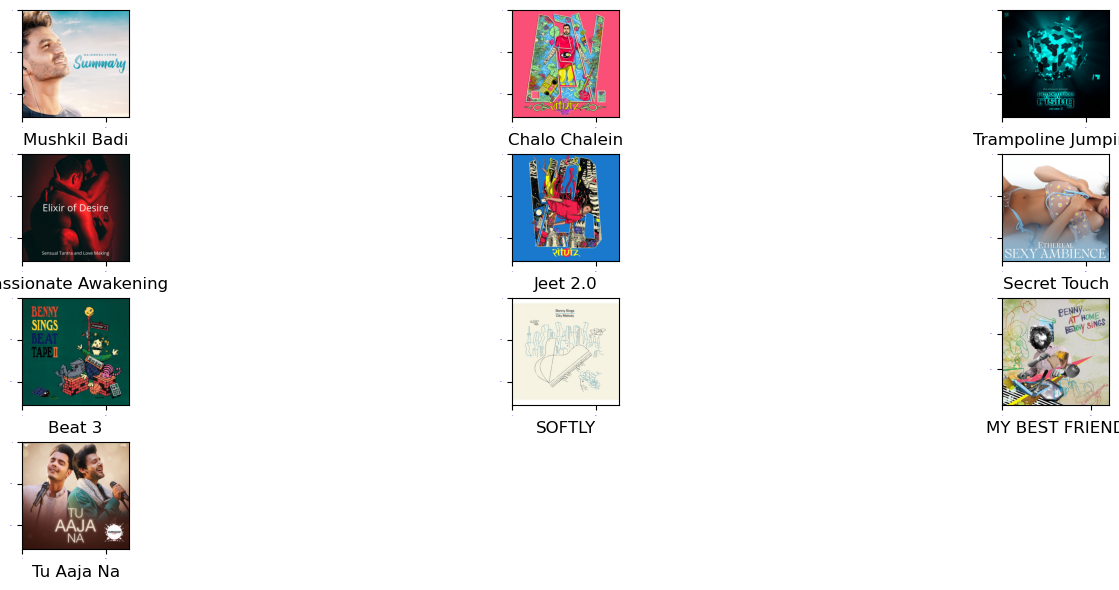

In [136]:
# Capture emotions from webcam
emotions = capture_and_detect_emotion(loaded_model)

# Recommend songs based on the most recent emotion
Recommend_Top10(emotions, spotify_df)